# Ejercicio 4 - Estadística descriptiva
Erik Yuste

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
game = pd.read_csv('games.csv')
rounds = pd.read_csv('round_in_games.csv')

## Words

### Distribución de preguntas por número de letras

word
7     8
6     3
13    1
Name: count, dtype: int64


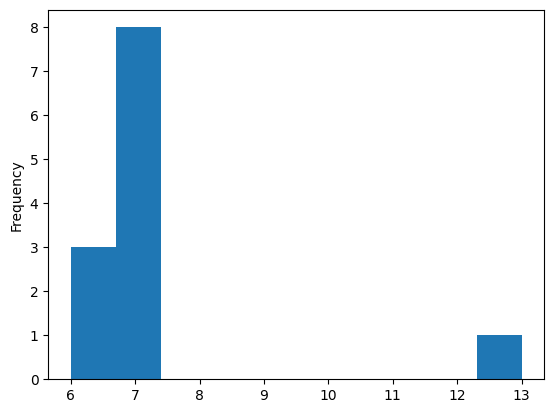

In [45]:
wordlen = rounds['word'].apply(len)
wordlen.plot.hist()
print(wordlen.value_counts())

## Rounds

### Número de usuarios diferentes que han participado en alguna partida

### Top 5 de usuarios que más rondas han ganado por partida

## Game

### Top 5 de usuarios con más puntuación final

### Top 5 de usuarios con más puntuación media
Media de la puntuación de sus partidas -> para esto debéis jugar varias partidas con un mismo nombre de usuario.

### Distribución de las puntuaciones de las partidas
Histograma

<Axes: ylabel='Frequency'>

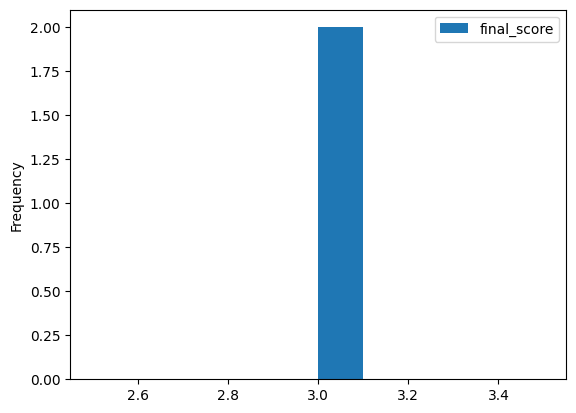

In [28]:
game.plot.hist()